In [2]:
import sys
print(sys.version)

#array and vector processing 
import numpy as np
print(f'Numpy version:', np.__version__)

import pandas as pd
print(f'Pandas version:', pd.__version__)

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
print(f'Matplotlib version:', mpl.__version__)
%matplotlib inline

import seaborn as sns
print(f'Seaborn version:', sns.__version__)

#using the datetime object properties in pandas
import datetime as dt
from datetime import timedelta

3.7.7 (default, Mar 23 2020, 17:31:31) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy version: 1.19.2
Pandas version: 1.2.4
Matplotlib version: 3.3.4
Seaborn version: 0.11.1


### Reading the data

In [3]:
df = pd.read_csv('./data/2_additional_col_set.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'duration', 'distance', 'manhattan_dist', 'duration_hours',
       'duration_min', 'dur_to_dist', 'dur_to_dist_m', 'speed_kmph',
       'speed_kmph_m', 'day_name', 'hour', 'price', 'month_name', 'day'],
      dtype='object')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048468 entries, 0 to 1048467
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Unnamed: 0          1048468 non-null  int64  
 1   id                  1048468 non-null  object 
 2   vendor_id           1048468 non-null  int64  
 3   pickup_datetime     1048468 non-null  object 
 4   dropoff_datetime    1048468 non-null  object 
 5   passenger_count     1048468 non-null  int64  
 6   pickup_longitude    1048468 non-null  float64
 7   pickup_latitude     1048468 non-null  float64
 8   dropoff_longitude   1048468 non-null  float64
 9   dropoff_latitude    1048468 non-null  float64
 10  store_and_fwd_flag  1048468 non-null  bool   
 11  duration            1048468 non-null  int64  
 12  distance            1048468 non-null  float64
 13  manhattan_dist      1048468 non-null  float64
 14  duration_hours      1048468 non-null  float64
 15  duration_min   

### subsetting the required data

In [6]:
df = df[['id','pickup_datetime','price']]

In [7]:
print(df.shape)
df.head(3)


(1048468, 3)


,id,pickup_datetime,price
0,id3487442,2016-02-29 18:39:00,8.783333
1,id1145809,2016-05-16 23:15:00,22.861667
2,id3499387,2016-01-25 19:45:00,14.666667


Let's use this subset of the dataframe for our visualisation purposes.

### Saving the sorted index and Parsing the datetime 

In [8]:
# Converting the data type for `pickup and dropoff` columns to datetimeIndex

df['pickup_datetime']= pd.to_datetime(df['pickup_datetime'])

df['dates'] = df['pickup_datetime'].dt.date
df['dates'] = pd.to_datetime(df['dates'])
# df['time'] = pd.to_datetime(df['pickup_datetime']).dt.time


In [9]:
# # setting the index and sorting the df.

# df_sort = df.set_index("pickup_datetime").sort_index()
# df = df_sort

In [10]:
# categories as default are unordered, setting the order of category for month and day names
from pandas.api.types import CategoricalDtype

month_cat = CategoricalDtype(categories=["January", "February","March","April","May","June"], ordered = True)
day_cat = CategoricalDtype(categories=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], ordered = True)


In [11]:
df["month_name"] = df['pickup_datetime'].dt.month_name().astype(month_cat)
df["day"] = df['pickup_datetime'].dt.day
df["day_name"] = df['pickup_datetime'].dt.day_name().astype(day_cat)
df["hour"] = df['pickup_datetime'].dt.hour


In [12]:
df = df[['id','pickup_datetime','dates','month_name','day_name','hour','day','price']]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048468 entries, 0 to 1048467
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   id               1048468 non-null  object        
 1   pickup_datetime  1048468 non-null  datetime64[ns]
 2   dates            1048468 non-null  datetime64[ns]
 3   month_name       1048468 non-null  category      
 4   day_name         1048468 non-null  category      
 5   hour             1048468 non-null  int64         
 6   day              1048468 non-null  int64         
 7   price            1048468 non-null  float64       
dtypes: category(2), datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 50.0+ MB


In [14]:
df.to_csv('./data/3_df_sort_datetime_set.csv')


## Plotting the Trend Lines

Text(0, 0.5, 'Count ')

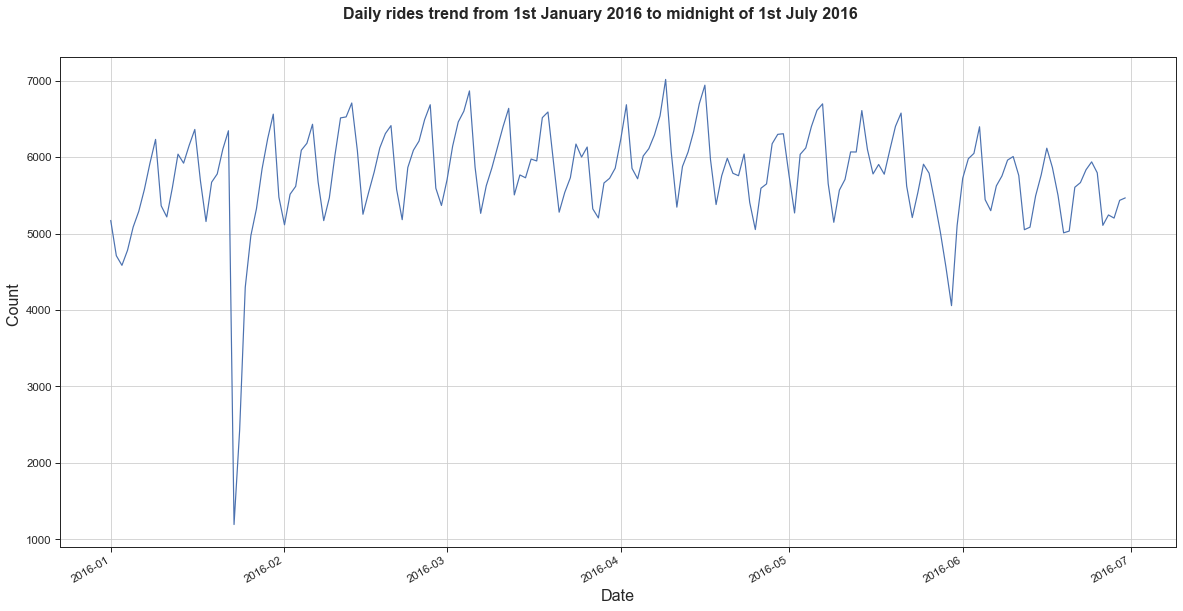

In [74]:
#plot of 6 month data between 1st January 2016 to midnight of 1st July 2016
# The total time window constitutes 182 days and 23 hours and 2 minutes.

fig,ax = plt.subplots(1, figsize=(20,10))
fig.suptitle('Daily rides trend from 1st January 2016 to midnight of 1st July 2016', size=16, y=0.95, weight='bold')

# sns.countplot(x='dates', data=df, ax=ax)

df['dates'].value_counts().plot(grid=True)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Count ', fontsize=16)

There are clear spikes in this data set for the 6 month taxi ride data - could be attributed to holidays / special occassios / others. Need to check the correlation with such events. 

Text(0.5, 1.0, 'Trips by hour')

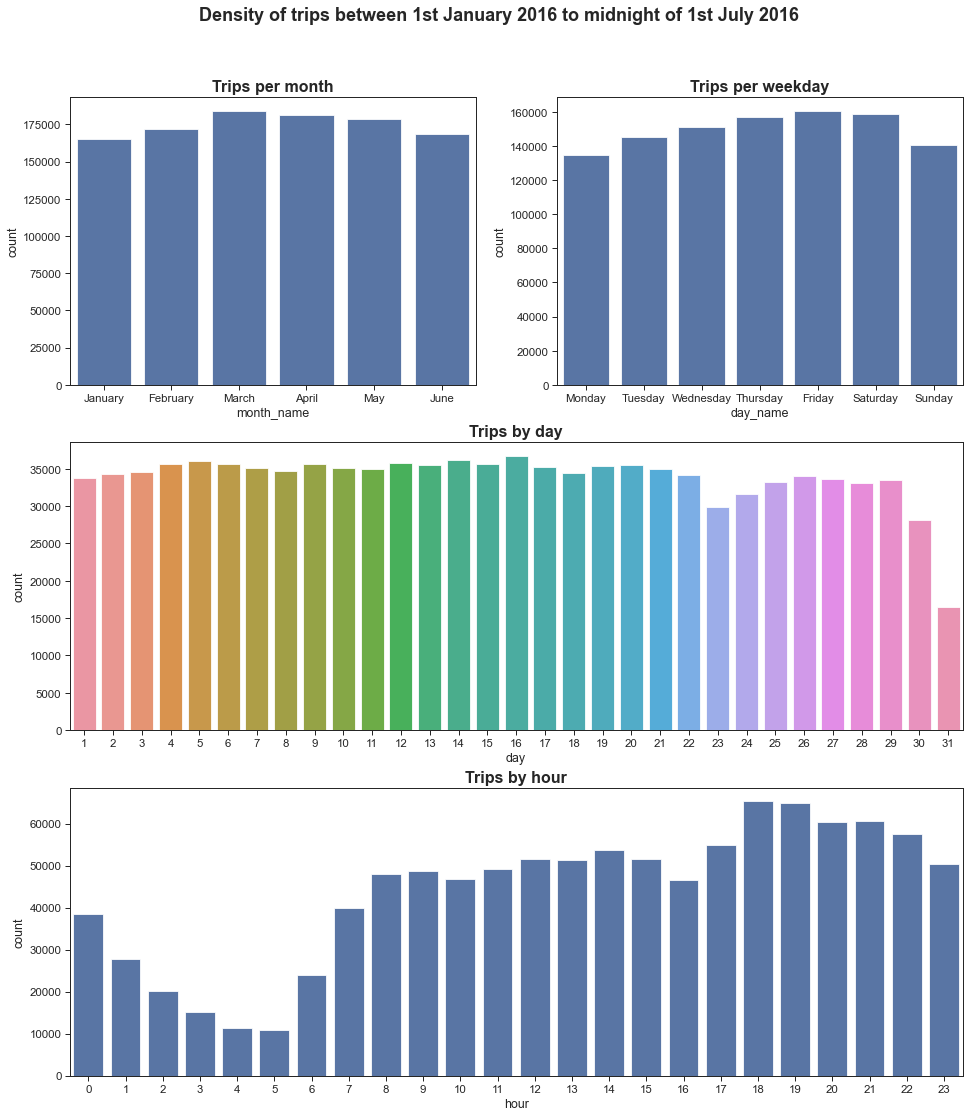

In [60]:
#adding figures

fig = plt.figure(figsize=(16,18))
ax1=fig.add_subplot(321)
ax2=fig.add_subplot(322)
ax3=fig.add_subplot(312)
ax4=fig.add_subplot(313)

#setting the styles
from matplotlib import style

#styles
style.use('ggplot')
sns.set_theme(style="whitegrid")
sns.set_style("ticks")
sns.set_context("paper", font_scale = 1.3,)

fig.suptitle('Density of trips between 1st January 2016 to midnight of 1st July 2016 ',fontsize='18', weight='bold',y=0.95)

#plot1

sns.countplot(x='month_name', data=df, ax=ax1, color='b')
ax1.set_title('Trips per month', fontsize='16',weight='bold')

#plot2

sns.countplot(x='day_name', data=df, ax=ax2, color='b')
ax2.set_title('Trips per weekday',fontsize='16',weight='bold')

#plot3

sns.countplot(x='day', data=df, ax=ax3)
ax3.set_title('Trips by day',fontsize='16',weight='bold')

#plot4

sns.countplot(x='hour', data=df, ax=ax4, color='C0')
ax4.set_title('Trips by hour',fontsize='16', weight='bold')

### Weekend versus Weekday comparsion of rides. 

In [17]:
df.day_name.value_counts()

Friday       160720
Saturday     158846
Thursday     157224
Wednesday    151052
Tuesday      145268
Sunday       140699
Monday       134659
Name: day_name, dtype: int64

In [18]:
weekend = ['Saturday', 'Sunday']
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
c1_weekend = df.day_name.isin(weekend)
c1_weekday = df.day_name.isin(weekday)

In [19]:
print(df.loc[c1_weekend].shape)
print(df.loc[c1_weekday].shape)


(299545, 8)
(748923, 8)


In [20]:
df_weekend = df.loc[c1_weekend]
df_weekday = df.loc[c1_weekday]
df_weekend.head(5)

,id,pickup_datetime,dates,month_name,day_name,hour,day,price
10,id3206922,2016-04-24 18:38:00,2016-04-24,April,Sunday,18,24,14.966667
17,id1712432,2016-01-31 17:46:00,2016-01-31,January,Sunday,17,31,20.800000
23,id3134126,2016-03-20 04:14:00,2016-03-20,March,Sunday,4,20,5.650000
28,id2706000,2016-01-17 00:25:00,2016-01-17,January,Sunday,0,17,7.950000
30,id2466113,2016-05-22 09:59:00,2016-05-22,May,Sunday,9,22,7.933333


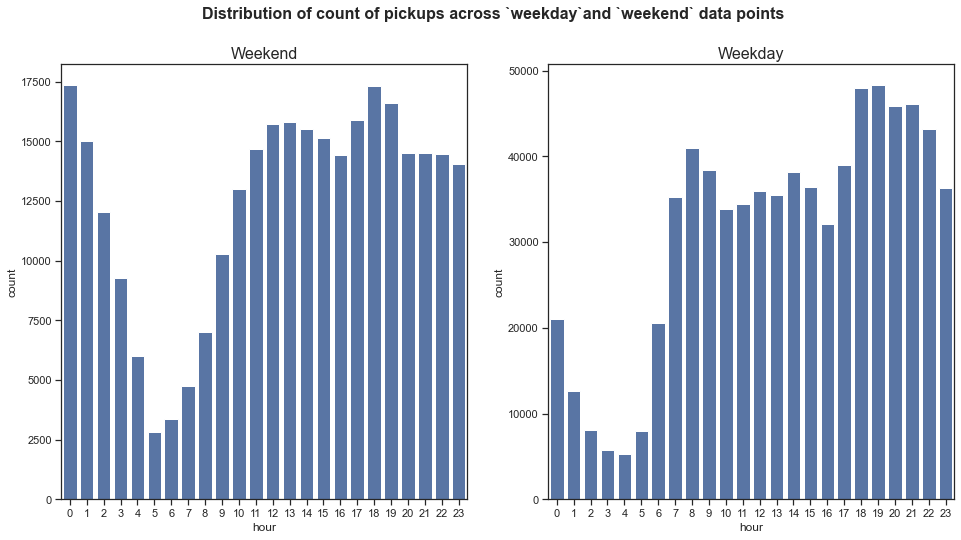

In [25]:
fig = plt.figure(figsize=(16,8))

ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

fig.suptitle('Distribution of count of pickups across `weekday`and `weekend` data points',fontsize='16',weight='bold')
ax1.set_title('Weekend', fontsize='16')
ax2.set_title('Weekday',fontsize='16')

sns.countplot(x='hour', data=df_weekend, ax=ax1, color='b' ) #eg: palette="rocket", palette="Blues"
sns.countplot(x='hour', data=df_weekday, ax=ax2, color='b')


# style.use('ggplot')
sns.set_theme(style="dark")
sns.set_style("ticks")


This comparison of 'weekend' and 'weekday' shows a clear high density pickup happening during the **midnight hours of 0:00 to 3:00 A.M** a clear winner for MVP planning for this time and weekend window.

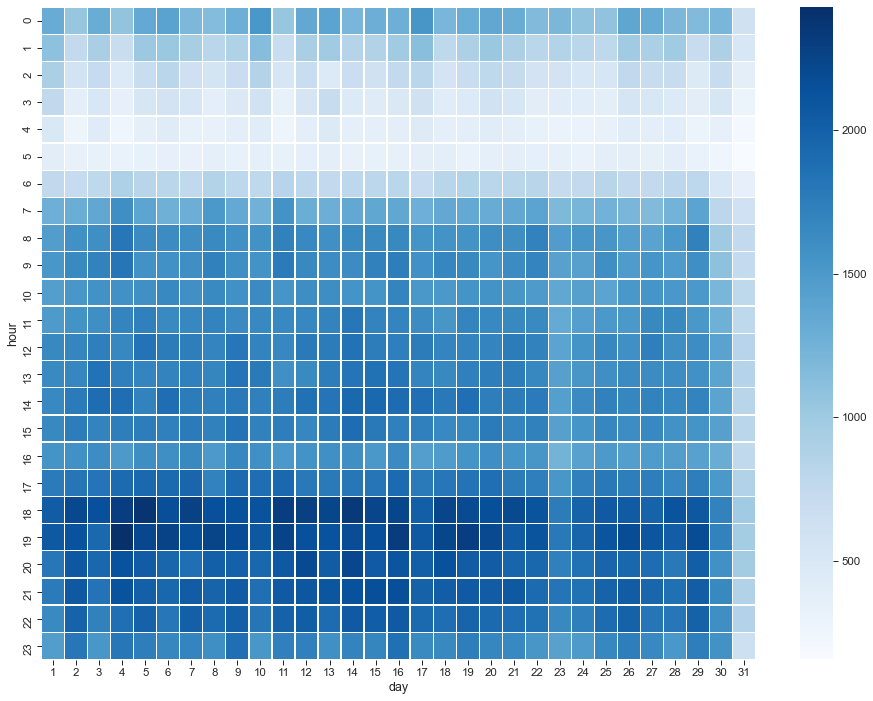

In [55]:
fig = plt.figure(figsize=(16,12))

table=df.groupby([df['day'],df['hour']]).size().unstack('day')

# table.style.background_gradient(cmap='Blues')

sns.heatmap(table, cmap='Blues', linewidths=.35)   #alternate option             
fig.savefig('densitymap of hour-day counts.png')
